<img style="float: right; margin: 0px 0px 15px 15px;" src="https://www.unionjalisco.mx/sites/default/files/styles/galeria/public/field/image/iteso_3_1.jpg?itok=M6pp1pEQ" width=200"px" height="100px" />

# PROYECTO TEMA 2


- Integrante 1: Castillo Fuhr Araceli Soledad

- Integrante 2: Ramírez Hinojosa Diana Laura


<img style="float: RIGHT; margin: 0px 0px 15px 15px;" src="https://profesionaljdeabajo.files.wordpress.com/2013/08/clima.png" width=400"px" height="200px" />

## 1.1 LA ENERGÍA SEGÚN EL ESTADO DE TIEMPO

<p style="text-align: justify;">Este proyecto se basará en la base de datos que el CENACE otorgó. El Centro Nacional de Control de Energía (CENACE) es un organismo público descentralizado cuyo objeto es ejercer el Control Operativo del Sistema Eléctrico Nacional.</p>


### 1.2 Objetivos.
#### 1.21 Objetivo general.
>  - Identificar si las variables del estado de tiempo deben ser consideradas en el pronóstico de la demanda de energía.
> #### 1.22 Objetivos específicos
>  - Determinar si la temperatura ponderada tiene una alta correlación con la demanda de energía.
>  - Establecer si la demanda de energía se ve afectada por la velocidad del viento ponderado.
>  - Precisar la relación entre la nubosidad y la demanda de energía
>  - Señalar si la demanda de energía y la lluvia son recíprocas

### 1.3 Definición del problema.
<p style="text-align: justify;"> El CENACE de occidente genera la energía necesaria para abastecer a nueve estados de la república. Debido a lo indispensable que es la energía para los mexicanos, este organismo público descentralizado debe ser capaz de abastecer la demanda de este insumo. El CENACE se enfrenta diariamente a tres posibles escenarios: </p>

>  - Que la producción de energía sea mayor a la demanda, generando pérdidas para la empresa.
>  - Que la demanda sea mayor a la producción de energía, dejando a muchas familias sin este recurso.
>  - Que la demanda y la producción sean equivalentes, que es lo ideal para este organismo. 

<p style="text-align: justify;">Es evidente entonces que es necesaria una producción acertada de la demanda. Para esto se utilizan modelos como regresiones. Pero el CENACE se encuentra ante un dilema: ¿Deben considerar, aparte de la información que la misma serie de datos otorga, las variables del estado del tiempo?</p>

<p style="text-align: justify;">Dicho lo anterior, el proyecto que a continución se desarrolla presentará cuatro nodos correspondientes a las cuatro variables del estado del tiempo que el CENACE cree que pueden ser relevantes en el prónistico de la demanda de energía</p>

<img src="Nodos.JPG">


### 1.4 Nodos y variables que se decidieron simular y porqué.
Como ya se mencionó en los objetivos y en la definición del problema, las variables que se decidieron simular son:
>  - Temperatura
>  - Lluvia
>  - Nubosidad
>  - Velocidad del viento

El problema que se abordará, analizando estas variables, es determinar si son modelables con algún tipo de distribución, para precisar si deben ser incluidas en el pronóstico de la gerencia del CENACE de Occidente, o si tomarlas en cuenta generaría únicamente ruido en el resultado.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st   
import seaborn as sns

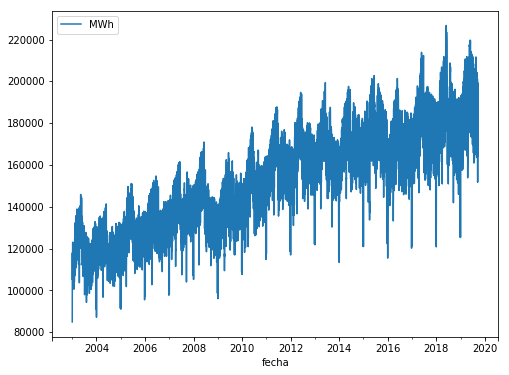

In [6]:
data=pd.read_excel('Consumo.xlsx',index_col='fecha')
data[['MWh']].plot(figsize=(8,6))

### Variable 1: temperatura promedio

In [1]:
data[['mín','max','prom']].plot(figsize=(8,6))
plt.show()
cambio_prom=data['prom']

NameError: name 'data' is not defined

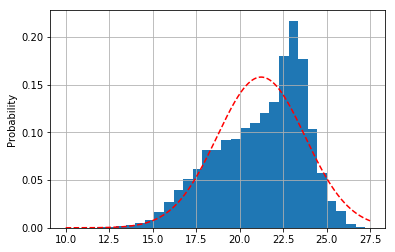

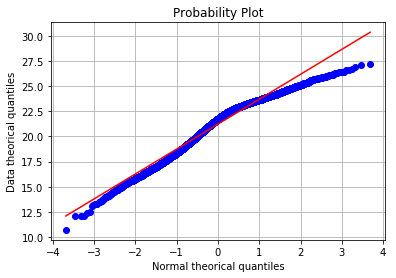

In [56]:
mup = np.mean(cambio_prom); sigmap =np.std(cambio_prom) 
J=30
plt.hist(cambio_prom,bins=J,density=True)
x = np.arange(10,27.5,.01)
y = st.norm.pdf(x,loc = mup, scale = sigmap)
plt.plot(x,y,'r--')
plt.ylabel('Probability')
plt.grid()
plt.show()
grap1 = st.probplot(cambio_prom, dist="norm", plot=plt)
plt.grid()
plt.xlabel('Normal theorical quantiles')
plt.ylabel('Data theorical quantiles')
plt.show()

Valor de chi cuadrado librería =  784441.2909535082
Estadístico de chi_cuadrado =  40.113272069413625
Media muestral =  21.23022784301813 
Desviación estándar muestral =  2.5259963359599724
Power_divergenceResult(statistic=784441.2909535082, pvalue=0.0)


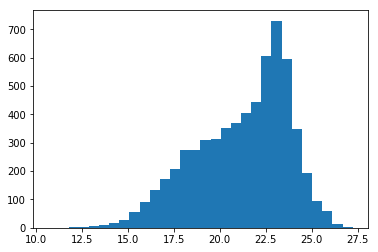

In [57]:
[freq,x,p]=plt.hist(cambio_prom,J,density=False)
# Se obvia el último valor de x para obtener exactamente J muestras de x
x = x[:-1] 

# Se desea resolver la siguiente prueba de hipótesis
#   H0: la distribución es normal con media= mu y std = sigma
#   Ha: los datos no se distribuyen normales
n  = len(x)
pi = st.norm.pdf(x,loc=mup,scale=sigmap)
Ei = n*pi

# Cálculo usando la librería estadística de la chi cuadrada
X2 = st.chisquare(freq,Ei)
print('Valor de chi cuadrado librería = ',list(X2)[0])

# Cálculo de Grados de libertad del estadístico
p = 2 # Parámetros estimados con los datos
m = J-p-1 # grados de libertad

Chi_est = st.chi2.ppf(q = 0.95,df=m)
print('Estadístico de chi_cuadrado = ',Chi_est)
print('Media muestral = ',mup,'\nDesviación estándar muestral = ',sigmap)
print(X2)
# se rechaza normalidad

In [70]:
from scipy import stats
dist_continu = [d for d in dir(stats) if isinstance(getattr(stats,d), stats.rv_continuous)]
del dist_continu[58]

In [35]:
def get_best_distribution(data):
    dist_names = dist_continu
    dist_results = []
    params = {}
    for dist_name in dist_names:
        dist = getattr(st, dist_name)
        param = dist.fit(data)

        params[dist_name] = param
        # Applying the Kolmogorov-Smirnov test
        D, p = st.kstest(data, dist_name, args=param)
        dist_results.append((dist_name, p))

    # select the best fitted distribution
    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
    # store the name of the best fit and its p value

    print("Best fitting distribution: "+str(best_dist))
    print("Best p value: "+ str(best_p))
    print("Parameters for the best fit: "+ str(params[best_dist]))

    return best_dist, best_p, params[best_dist]
print(get_best_distribution(cambio_prom))

C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2305: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:312: RuntimeWarning: divide by zero encountered in true_divide
  return 1.0/np.pi/np.sqrt(x*(1-x))
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:589: RuntimeWarning: divide by zero encountered in true_divide
  a/(b-1.0),
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:593: RuntimeWarning: divide by zero encountered in true_divide
  a*(a+1.0)/((b-2.0)*(b-1.0)),
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1037: RuntimeWarning: invalid value encountered in subtract
  mu2 = mu2p - mu * mu
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non

C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 35.89738347545999.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 32.22884625860803.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 34.84754095618305.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 36.20878927087267.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the er

C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 81.99812627354675.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 82.79835932564481.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 79.4363775452264.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 80.22100712092512.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erl

C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 148.4208460693331.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 154.63683199024905.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 157.2994933540083.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 150.6405078905019.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the e

C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 229.45923838649645.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 236.54715122890008.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 241.65731135125407.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 241.54679246976758.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of th

C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 298.8905229251852.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 298.6179423509137.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 299.032063961356.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 299.86539012646284.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the er

C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:4762: RuntimeWarning: overflow encountered in exp
  Px = np.exp(trm1)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:4768: RuntimeWarning: invalid value encountered in multiply
  Px *= trm1+trm2
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:4765: RuntimeWarning: overflow encountered in multiply
  trm1 /= np.asarray(fac1*sc.gamma((n+1)/2))
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:4767: RuntimeWarning: overflow encountered in multiply
  trm2 /= np.asarray(np.sqrt(fac1)*sc.gamma(n/2+1))
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:3260: RuntimeWarning: overflow encountered in exp
  fac1 = a / np.pi * np.exp(gamma)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:3262: RuntimeWarning: invalid value encountered in multiply
  return fac1 * sc.k1e(a * sq) * np.ex

Best fitting distribution: skewnorm
Best p value: 5.79816809469357e-07
Parameters for the best fit: (-4.401087096054014, 24.399072178827144, 4.052444427628722)
('skewnorm', 5.79816809469357e-07, (-4.401087096054014, 24.399072178827144, 4.052444427628722))


C:\Users\Diana\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:563: RuntimeWarning: invalid value encountered in subtract
  numpy.max(numpy.abs(fsim[0] - fsim[1:])) <= fatol):


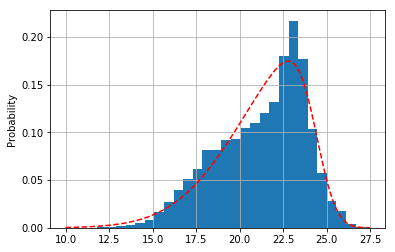

In [59]:
plt.hist(cambio_prom,bins=30,density=True)
x = np.arange(10,27.5,.01)
y = st.skewnorm.pdf(x, -4.401087096054014, 24.399072178827144, 4.052444427628722)
plt.plot(x,y,'r--')
plt.ylabel('Probability')
plt.grid()
plt.show()

In [68]:
from sklearn.neighbors.kde import KernelDensity
#cambio_prom = np.array(cambio_prom)
kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(cambio_prom[:,None])
result = kde.score_samples(cambio_prom[:,None])

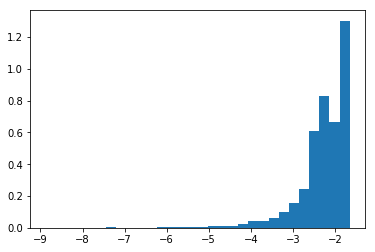

In [69]:
plt.hist(result,bins=30,density=True)
plt.show()

In [71]:
def get_best_distribution(data):
    dist_names = dist_continu
    dist_results = []
    params = {}
    for dist_name in dist_names:
        dist = getattr(st, dist_name)
        param = dist.fit(data)

        params[dist_name] = param
        # Applying the Kolmogorov-Smirnov test
        D, p = st.kstest(data, dist_name, args=param)
        dist_results.append((dist_name, p))

    # select the best fitted distribution
    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
    # store the name of the best fit and its p value

    print("Best fitting distribution: "+str(best_dist))
    print("Best p value: "+ str(best_p))
    print("Parameters for the best fit: "+ str(params[best_dist]))

    return best_dist, best_p, params[best_dist]
print(get_best_distribution(result))

C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2305: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:312: RuntimeWarning: divide by zero encountered in true_divide
  return 1.0/np.pi/np.sqrt(x*(1-x))
C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:437: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:589: RuntimeWarning: divide by zero encountered in true_divide
  a/(b-1.0),
C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\stats\_con

C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.40794046493862707.
  RuntimeWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.40844288685250363.
  RuntimeWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.40834954119556743.
  RuntimeWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.40831082940972796.
  RuntimeWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape p

C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.408240053677835.
  RuntimeWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.40824005310579037.
  RuntimeWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.4082400542299959.
  RuntimeWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.4082400544007936.
  RuntimeWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape param

C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:1380: RuntimeWarning: invalid value encountered in add
  negxc + sc.xlogy(c - 1.0, x))
C:\Users\Usuario\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: `frechet_l` is deprecated!
The distribution `frechet_l` is a synonym for `weibull_max`; this historical
usage is deprecated because of possible confusion with the (quite different)
Frechet distribution.  To preserve the existing behavior of the program, use
`scipy.stats.weibull_max`.  For the Frechet distribution (i.e. the Type II
extreme value distribution), use `scipy.stats.invweibull`.
  import sys
C:\Users\Usuario\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: `frechet_r` is deprecated!
The distribution `frechet_r` is a synonym for `weibull_min`; this historical
usage is deprecated because of possible confusion with the (quite different)
Frechet distribution.  To preserve the existing behavior of the prog

Best fitting distribution: burr
Best p value: 5.119889727602601e-23
Parameters for the best fit: (228.0722522373187, 0.07873905106737827, -14.116562142877417, 12.472975610147133)
('burr', 5.119889727602601e-23, (228.0722522373187, 0.07873905106737827, -14.116562142877417, 12.472975610147133))


C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:563: RuntimeWarning: invalid value encountered in subtract
  numpy.max(numpy.abs(fsim[0] - fsim[1:])) <= fatol):


In [88]:
from sklearn.grid_search import GridSearchCV
grid = GridSearchCV(KernelDensity(),
                    {'bandwidth':(0.1, 1.0, 30)},
                    cv=20) # 20-fold cross-validation
grid.fit(cambio_prom[:, None])
#print (grid.best_params_)

GridSearchCV(cv=20, error_score='raise',
       estimator=KernelDensity(algorithm='auto', atol=0, bandwidth=1.0, breadth_first=True,
       kernel='gaussian', leaf_size=40, metric='euclidean',
       metric_params=None, rtol=0),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'bandwidth': (0.1, 1.0, 30)}, pre_dispatch='2*n_jobs',
       refit=True, scoring=None, verbose=0)

In [62]:
cambio_prom[:, None]

array([[18.28571429],
       [16.89285714],
       [17.64285714],
       ...,
       [21.28343883],
       [21.50696485],
       [21.3423651 ]])

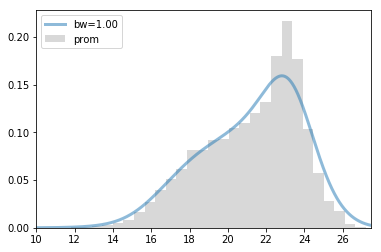

In [80]:
from sklearn.grid_search import GridSearchCV
kde = grid.best_estimator_
x = np.linspace(10,27.5,6109)
pdf = np.exp(kde.score_samples(x[:, None]))
fig, ax = plt.subplots()
ax.plot(x, pdf, linewidth=3, alpha=0.5, label='bw=%.2f' % kde.bandwidth)
ax.hist(cambio_prom, 30, fc='gray', histtype='stepfilled', alpha=0.3, density=True)
ax.legend(loc='upper left')
ax.set_xlim(10, 27.5);

Valor de chi cuadrado librería =  2117015.510167709
Estadístico de chi_cuadrado =  41.33713815142739
Power_divergenceResult(statistic=2117015.510167709, pvalue=0.0)


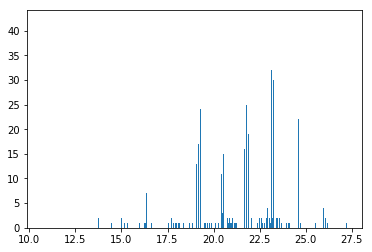

In [87]:
[freq,x,p]=plt.hist(cambio_prom,6109,density=False)
# Se obvia el último valor de x para obtener exactamente J muestras de x
x = np.linspace(10,27.5,6109)
x = x[:-1] 

# Se desea resolver la siguiente prueba de hipótesis
#   H0: la distribución es normal con media= mu y std = sigma
#   Ha: los datos no se distribuyen normales
n  = len(x)
pi = pdf
Ei = n*pi

# Cálculo usando la librería estadística de la chi cuadrada
X2 = st.chisquare(freq,Ei)
print('Valor de chi cuadrado librería = ',list(X2)[0])

# Cálculo de Grados de libertad del estadístico
p = 1 # Parámetros estimados con los datos
m = J-p-1 # grados de libertad

Chi_est = st.chi2.ppf(q = 0.95,df=m)
print('Estadístico de chi_cuadrado = ',Chi_est)
#print('Media muestral = ',mup,'\nDesviación estándar muestral = ',sigmap)
print(X2)
# se rechaza normalidad

### Variable 2: Nubosidad

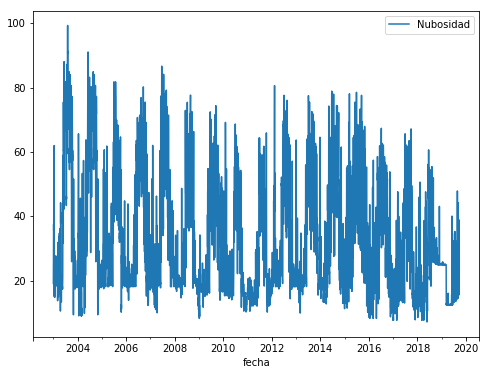

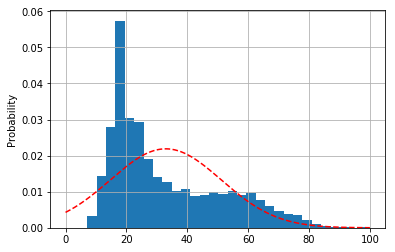

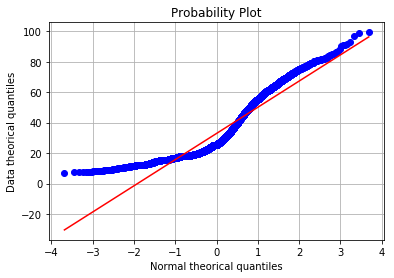

In [36]:
cambio_nubosidad=data['Nubosidad']
data[['Nubosidad']].plot(figsize=(8,6))
plt.show()

mun = np.mean(cambio_nubosidad); sigman =np.std(cambio_nubosidad)   

plt.hist(cambio_nubosidad,bins=30,density=True)
x = np.arange(0,100,.01)
y = st.norm.pdf(x,loc = mun, scale = sigman)
plt.plot(x,y,'r--')
plt.ylabel('Probability')
plt.grid()
plt.show()
grap1 = st.probplot(cambio_nubosidad, dist="norm", plot=plt)
plt.grid()
plt.xlabel('Normal theorical quantiles')
plt.ylabel('Data theorical quantiles')
plt.show()

Valor de chi cuadrado librería =  6521666.23343216
Estadístico de chi_cuadrado =  40.113272069413625
Media muestral =  32.93493580627912 
Desviación estándar muestral =  18.224760581367633
Power_divergenceResult(statistic=6521666.23343216, pvalue=0.0)


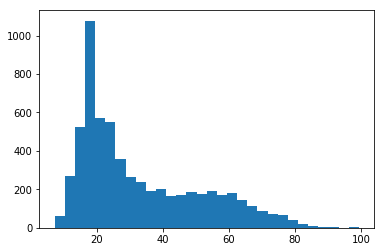

In [40]:
[freq,x,p]=plt.hist(cambio_nubosidad,J,density=False)
# Se obvia el último valor de x para obtener exactamente J muestras de x
x = x[:-1] 

# Se desea resolver la siguiente prueba de hipótesis
#   H0: la distribución es normal con media= mu y std = sigma
#   Ha: los datos no se distribuyen normales
n  = len(x)
pi = st.norm.pdf(x,loc=mun,scale=sigman)
Ei = n*pi

# Cálculo usando la librería estadística de la chi cuadrada
X2 = st.chisquare(freq,Ei)
print('Valor de chi cuadrado librería = ',list(X2)[0])

# Cálculo de Grados de libertad del estadístico
p = 2 # Parámetros estimados con los datos
m = J-p-1 # grados de libertad

Chi_est = st.chi2.ppf(q = 0.95,df=m)
print('Estadístico de chi_cuadrado = ',Chi_est)
print('Media muestral = ',mun,'\nDesviación estándar muestral = ',sigman)
print(X2)
# se rechaza normalidad

In [41]:
print(get_best_distribution(cambio_nubosidad))

C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2305: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:312: RuntimeWarning: divide by zero encountered in true_divide
  return 1.0/np.pi/np.sqrt(x*(1-x))
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1615: RuntimeWarning: invalid value encountered in log
  return log(self._pdf(x, *args))
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:6532: RuntimeWarning: divide by zero encountered in double_scalars
  return chi**3 / (_norm_pdf_C * _argus_phi(chi)) * x * np.sqrt(y) * np.exp(-chi**2 * y / 2)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:437: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\sta

C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 2.0615719348843466.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 2.0537771704429755.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 2.087933912005984.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 2.0778970331095574.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the

C:\Users\Diana\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: `frechet_l` is deprecated!
The distribution `frechet_l` is a synonym for `weibull_max`; this historical
usage is deprecated because of possible confusion with the (quite different)
Frechet distribution.  To preserve the existing behavior of the program, use
`scipy.stats.weibull_max`.  For the Frechet distribution (i.e. the Type II
extreme value distribution), use `scipy.stats.invweibull`.
  import sys
C:\Users\Diana\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: `frechet_r` is deprecated!
The distribution `frechet_r` is a synonym for `weibull_min`; this historical
usage is deprecated because of possible confusion with the (quite different)
Frechet distribution.  To preserve the existing behavior of the program, use
`scipy.stats.weibull_min`.  For the Frechet distribution (i.e. the Type II
extreme value distribution), use `scipy.stats.invweibull`.
  import sys
C:\Users\Diana

Best fitting distribution: exponnorm
Best p value: 2.1395483927627596e-19
Parameters for the best fit: (7.452702468413757, 13.253517250992985, 2.6408378049633994)
('exponnorm', 2.1395483927627596e-19, (7.452702468413757, 13.253517250992985, 2.6408378049633994))


C:\Users\Diana\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:563: RuntimeWarning: invalid value encountered in subtract
  numpy.max(numpy.abs(fsim[0] - fsim[1:])) <= fatol):


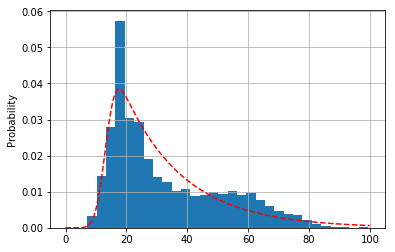

In [42]:
plt.hist(cambio_nubosidad,bins=30,density=True)
x = np.arange(-0,100,.01)
y = st.exponnorm.pdf(x, 7.452702468413757, 13.253517250992985, 2.6408378049633994)
plt.plot(x,y,'r--')
plt.ylabel('Probability')
plt.grid()
plt.show()

### Variable 3: Velocidad del viento

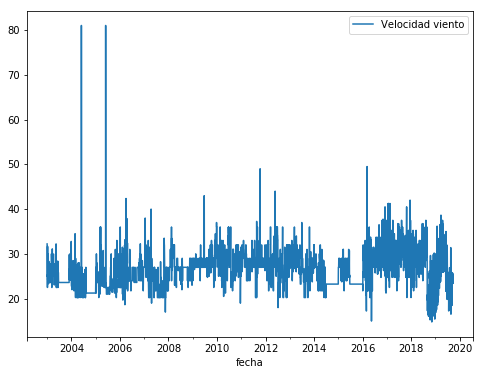

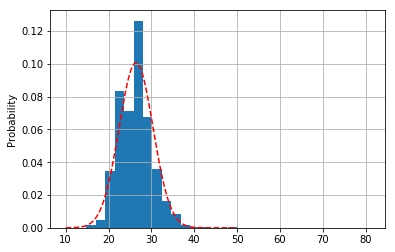

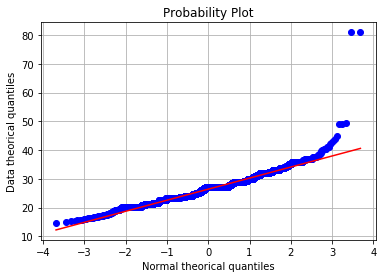

In [45]:
cambio_velocidad=data['Velocidad viento']
data[['Velocidad viento']].plot(figsize=(8,6))
plt.show()

muv = np.mean(cambio_velocidad); sigmav =np.std(cambio_velocidad)

plt.hist(cambio_velocidad,bins=30,density=True)
x = np.arange(10,50,.01)
y = st.norm.pdf(x,loc = muv, scale = sigmav)
plt.plot(x,y,'r--')
plt.ylabel('Probability')
plt.grid()
plt.show()
grap1 = st.probplot(cambio_velocidad, dist="norm", plot=plt)
plt.grid()
plt.xlabel('Normal theorical quantiles')
plt.ylabel('Data theorical quantiles')
plt.show()

Valor de chi cuadrado librería =  1.0933581959686168e+38
Estadístico de chi_cuadrado =  40.113272069413625
Media muestral =  26.42214931223343 
Desviación estándar muestral =  3.96326091812156
Power_divergenceResult(statistic=1.0933581959686168e+38, pvalue=0.0)


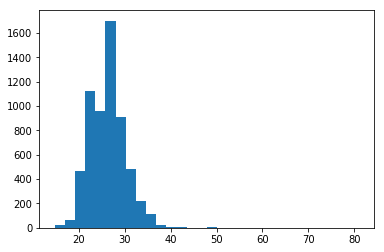

In [46]:
[freq,x,p]=plt.hist(cambio_velocidad,J,density=False)
# Se obvia el último valor de x para obtener exactamente J muestras de x
x = x[:-1] 

# Se desea resolver la siguiente prueba de hipótesis
#   H0: la distribución es normal con media= mu y std = sigma
#   Ha: los datos no se distribuyen normales
n  = len(x)
pi = st.norm.pdf(x,loc=muv,scale=sigmav)
Ei = n*pi

# Cálculo usando la librería estadística de la chi cuadrada
X2 = st.chisquare(freq,Ei)
print('Valor de chi cuadrado librería = ',list(X2)[0])

# Cálculo de Grados de libertad del estadístico
p = 2 # Parámetros estimados con los datos
m = J-p-1 # grados de libertad

Chi_est = st.chi2.ppf(q = 0.95,df=m)
print('Estadístico de chi_cuadrado = ',Chi_est)
print('Media muestral = ',muv,'\nDesviación estándar muestral = ',sigmav)
print(X2)
# se rechaza normalidad

In [47]:
print(get_best_distribution(cambio_velocidad))

C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2305: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:312: RuntimeWarning: divide by zero encountered in true_divide
  return 1.0/np.pi/np.sqrt(x*(1-x))
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:6532: RuntimeWarning: divide by zero encountered in double_scalars
  return chi**3 / (_norm_pdf_C * _argus_phi(chi)) * x * np.sqrt(y) * np.exp(-chi**2 * y / 2)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:437: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, Run

C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.9932869283831345.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.999489156616981.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.9953284301927943.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.9984606334316645.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the

C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.9994118500708413.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.999463901508603.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.9994200574255228.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.999395392446611.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the 

C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.9991126778874972.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.9991121039759073.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.9991124865836339.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.9991121996278389.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of th

C:\Users\Diana\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: `frechet_l` is deprecated!
The distribution `frechet_l` is a synonym for `weibull_max`; this historical
usage is deprecated because of possible confusion with the (quite different)
Frechet distribution.  To preserve the existing behavior of the program, use
`scipy.stats.weibull_max`.  For the Frechet distribution (i.e. the Type II
extreme value distribution), use `scipy.stats.invweibull`.
  import sys
C:\Users\Diana\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: `frechet_r` is deprecated!
The distribution `frechet_r` is a synonym for `weibull_min`; this historical
usage is deprecated because of possible confusion with the (quite different)
Frechet distribution.  To preserve the existing behavior of the program, use
`scipy.stats.weibull_min`.  For the Frechet distribution (i.e. the Type II
extreme value distribution), use `scipy.stats.invweibull`.
  import sys
C:\Users\Diana

Best fitting distribution: t
Best p value: 5.9337692753050115e-59
Parameters for the best fit: (9.976497082087349, 26.284949497390656, 3.4635808676871207)
('t', 5.9337692753050115e-59, (9.976497082087349, 26.284949497390656, 3.4635808676871207))


C:\Users\Diana\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:563: RuntimeWarning: invalid value encountered in subtract
  numpy.max(numpy.abs(fsim[0] - fsim[1:])) <= fatol):


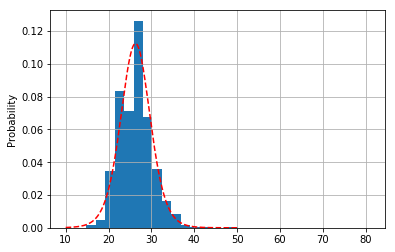

In [48]:
plt.hist(cambio_velocidad,bins=30,density=True)
x = np.arange(10,50,.01)
y = st.t.pdf(x, 9.976497082087349, 26.284949497390656, 3.4635808676871207)
plt.plot(x,y,'r--')
plt.ylabel('Probability')
plt.grid()
plt.show()

## Variable 4: Lluvia

C:\Users\Diana\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


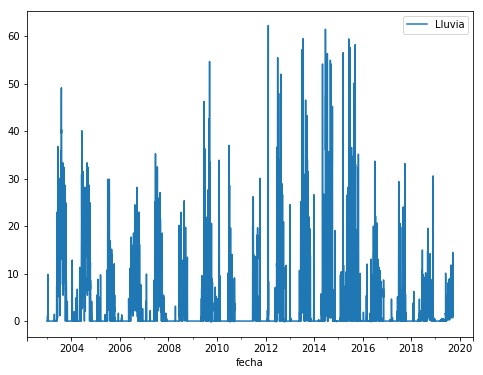

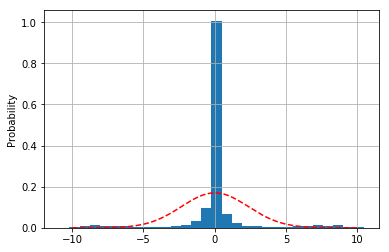

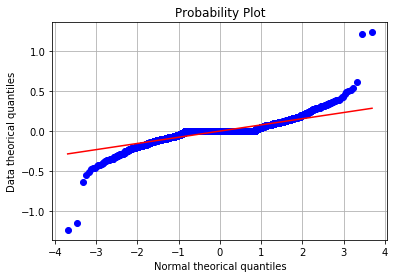

In [17]:
cambio_lluvia=np.log(data['Lluvia']/data['Lluvia'].shift()).dropna()
data[['Lluvia']].plot(figsize=(8,6))
plt.show()

mul = np.mean(cambio_lluvia); sigmal =np.std(cambio_lluvia)

plt.hist(cambio_lluvia,bins=30,density=True)
x = np.arange(-10,10,.01)
y = st.norm.pdf(x,loc = mul, scale = sigmal)
plt.plot(x,y,'r--')
plt.ylabel('Probability')
plt.grid()
plt.show()
grap1 = st.probplot(cambio_velocidad, dist="norm", plot=plt)
plt.grid()
plt.xlabel('Normal theorical quantiles')
plt.ylabel('Data theorical quantiles')
plt.show()

Valor de chi cuadrado librería =  6438536.696114304
Estadístico de chi_cuadrado =  40.113272069413625
Media muestral =  0.00865196656000384 
Desviación estándar muestral =  2.347185434025944
Power_divergenceResult(statistic=6438536.696114304, pvalue=0.0)


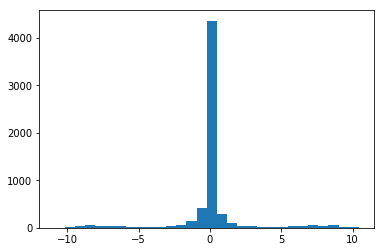

In [18]:
[freq,x,p]=plt.hist(cambio_lluvia,J,density=False)
# Se obvia el último valor de x para obtener exactamente J muestras de x
x = x[:-1] 
# Se desea resolver la siguiente prueba de hipótesis
#   H0: la distribución es normal con media= mu y std = sigma
#   Ha: los datos no se distribuyen normales
n  = len(x)
pi = st.norm.pdf(x,loc=mul,scale=sigmal)
Ei = n*pi

# Cálculo usando la librería estadística de la chi cuadrada
X2 = st.chisquare(freq,Ei)
print('Valor de chi cuadrado librería = ',list(X2)[0])

# Cálculo de Grados de libertad del estadístico
p = 2 # Parámetros estimados con los datos
m = J-p-1 # grados de libertad

Chi_est = st.chi2.ppf(q = 0.95,df=m)
print('Estadístico de chi_cuadrado = ',Chi_est)
print('Media muestral = ',mul,'\nDesviación estándar muestral = ',sigmal)
print(X2)
# se rechaza normalidad

In [ ]:
print(get_best_distribution(cambio_lluvia))

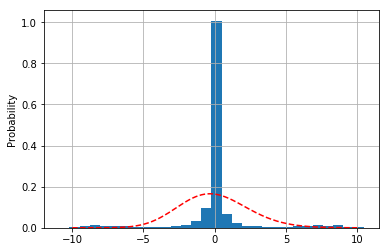

In [19]:
plt.hist(cambio_lluvia,bins=30,density=True)
x = np.arange(-10,10,.01)
y = st.alpha.pdf(x, 22.135457030945275, -53.659348014763026, 1185.1081291183473)
plt.plot(x,y,'r--')
plt.ylabel('Probability')
plt.grid()
plt.show()

C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Diana\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Diana\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Diana\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, a

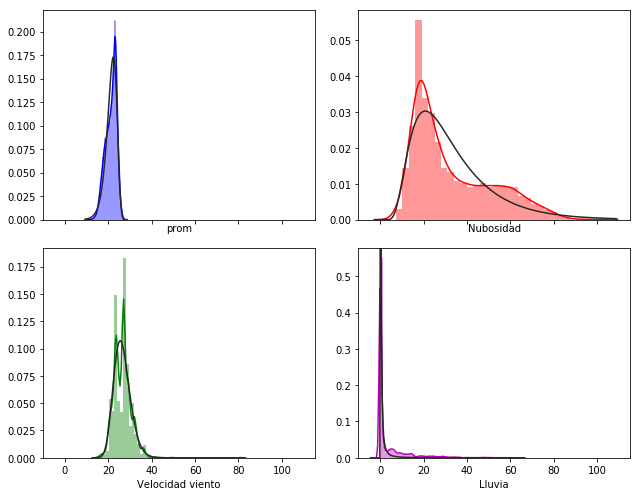

In [49]:
f, axes = plt.subplots(2, 2, figsize=(9, 7), sharex=True)
# Plot a simple histogram with binsize determined automatically
sns.distplot(data['prom'], color="b", fit=st.johnsonsu, norm_hist=True, ax=axes[0, 0],)
sns.distplot(data['Nubosidad'], color="r", fit=st.norminvgauss, norm_hist=True, ax=axes[0, 1])
sns.distplot(data['Velocidad viento'], color="g", fit=st.alpha, norm_hist=True, ax=axes[1, 0])
sns.distplot(data['Lluvia'], color="m", fit=st.alpha, norm_hist=True, ax=axes[1, 1])
plt.tight_layout()